In [330]:
# some useful mysklearn package import statements and reloads
import importlib
import matplotlib.pyplot as plt
import copy

import mysklearn.myutils
importlib.reload(mysklearn.myutils)
import mysklearn.myutils as myutils

# uncomment once you paste your mypytable.py into mysklearn package
import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable 

# uncomment once you paste your myclassifiers.py into mysklearn package
import mysklearn.myclassifiers
importlib.reload(mysklearn.myclassifiers)
from mysklearn.myclassifiers import MyKNeighborsClassifier, MyDummyClassifier, MyNaiveBayesClassifier, MyDecisionTreeClassifier, MyRandomForestClassifier

import mysklearn.myevaluation
importlib.reload(mysklearn.myevaluation)
import mysklearn.myevaluation as myevaluation

import mysklearn.pokemonDiscretizers
importlib.reload(mysklearn.pokemonDiscretizers)
import mysklearn.pokemonDiscretizers as pokemonDiscretizers

In [331]:
pokemonData = MyPyTable()
completePokemonData = MyPyTable()

pokemonData.load_from_file("pokemon - pokemon.csv")
completePokemonData.load_from_file("pokemon - pokemon.csv")

# pokemonData.pretty_print()
# for i, val in enumerate(pokemonData.column_names):
#     if i > 20:
#         print(i, val)

cols_to_drop = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 24, 27, 29, 30, 31, 32, 36, 37, 39]
# abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
#  0,            1,             2,         3,            4,              5,           6,               7,             8,            9,           10,           11             12        13              14           15               16              17             18      19    20              21             22              23        24            25    26                27     28   29            30    31              32           33         34         35    36   37       38          39       40
pokemonData.drop_cols(cols_to_drop)
# for i, val in enumerate(pokemonData.column_names):
#     print(i, val)

# count = 0
# for i, val in enumerate(pokemonData.data):
#     if pokemonData.data[i][-1] == 1.0:
#         count += 1
#         print(val)

# pokemonData.pretty_print()
pokemonData.save_to_file("dropped_pokemon.csv")

### Discretizer Helper

Use the code below to calculate the equal width bin cut offs for each stat discretizer

[5.0, 22.6, 40.2, 57.8, 75.4, 93.0, 110.6, 128.2, 145.8, 163.4, 181.0]
[15, 78, 141, 201, 148, 124, 65, 40, 7, 4]


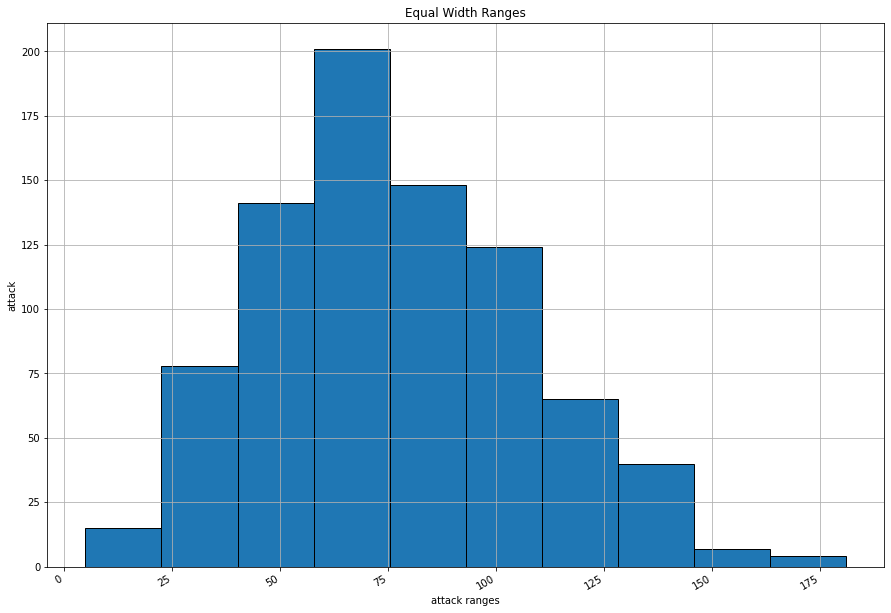

In [332]:
col = pokemonData.get_column("attack")
# for i, val in enumerate(col):
#     print(col)

cutoffs = pokemonDiscretizers.compute_equal_width_cutoffs(col, 10)
print(cutoffs)
# 2. 
freqs = pokemonDiscretizers.compute_bin_frequencies(col, cutoffs)
print(freqs)
# 3.
plt.figure(figsize=(15, 10))
plt.bar(cutoffs[:-1], freqs, width=(cutoffs[1] - cutoffs[0]), edgecolor="black", align="edge")
plt.title("Equal Width Ranges")
plt.xlabel("attack ranges")
plt.ylabel("attack")
plt.xticks(rotation=30, ha="right") # parallel lines
plt.grid(True)
plt.show()

In [333]:
# attack
attack = pokemonData.get_column("attack")
dis_attack = pokemonDiscretizers.attack_discretizer(attack)
attack_index = pokemonData.column_names.index("attack")
# defense
defense = pokemonData.get_column("defense")
dis_defense = pokemonDiscretizers.defense_discretizer(defense)
defense_index = pokemonData.column_names.index("defense")
# hp
hp = pokemonData.get_column("hp")
dis_hp = pokemonDiscretizers.hp_discretizer(hp)
hp_index = pokemonData.column_names.index("hp")
# sp_defense
sp_defense = pokemonData.get_column("sp_defense")
dis_sp_defense = pokemonDiscretizers.sp_defense_discretizer(sp_defense)
sp_defense_index = pokemonData.column_names.index("sp_defense")
# sp_attack
sp_attack = pokemonData.get_column("sp_attack")
dis_sp_attack = pokemonDiscretizers.sp_attack_discretizer(sp_attack)
sp_attack_index = pokemonData.column_names.index("sp_attack")
# speed
speed = pokemonData.get_column("speed")
dis_speed = pokemonDiscretizers.speed_discretizer(speed)
speed_index = pokemonData.column_names.index("speed")
# base_happiness
base_happiness = pokemonData.get_column("base_happiness")
dis_base_happiness = pokemonDiscretizers.base_happiness_discretizer(base_happiness)
base_happiness_index = pokemonData.column_names.index("base_happiness")
# base_total
base_total = pokemonData.get_column("base_total")
dis_base_total = pokemonDiscretizers.base_total_discretizer(base_total)
base_total_index = pokemonData.column_names.index("base_total")
capture_rate
capture_rate = pokemonData.get_column("capture_rate")
dis_capture_rate = pokemonDiscretizers.capture_rate_discretizer(capture_rate)
capture_rate_index = pokemonData.column_names.index("capture_rate")
# experience_growth
experience_growth = pokemonData.get_column("experience_growth")
dis_experience_growth = pokemonDiscretizers.experience_growth_discretizer(experience_growth)
experience_growth_index = pokemonData.column_names.index("experience_growth")
# # height_m
# height_m = pokemonData.get_column("height_m")
# dis_height_m = pokemonDiscretizers.height_m_discretizer(height_m)
# height_m_index = pokemonData.column_names.index("height_m")
# # weight_kg
# weight_kg = pokemonData.get_column("weight_kg")
# dis_weight_kg = pokemonDiscretizers.weight_kg_discretizer(weight_kg)
# weight_kg_index = pokemonData.column_names.index("weight_kg")

# type 2 for monotypes
# type2_index = pokemonData.column_names.index("type2")

for i in range(len(pokemonData.data)):
    pokemonData.data[i][attack_index] = dis_attack[i]
    pokemonData.data[i][defense_index] = dis_defense[i]
    pokemonData.data[i][sp_attack_index] = dis_sp_attack[i]
    pokemonData.data[i][sp_defense_index] = dis_sp_defense[i]
    pokemonData.data[i][hp_index] = dis_hp[i]
    pokemonData.data[i][speed_index] = dis_speed[i]
    # pokemonData.data[i][height_m_index] = dis_height_m[i]
    # pokemonData.data[i][weight_kg_index] = dis_weight_kg[i]
    pokemonData.data[i][base_total_index] = dis_base_total[i]
    pokemonData.data[i][base_happiness_index] = dis_base_happiness[i]
    pokemonData.data[i][capture_rate_index] = dis_capture_rate[i]
    pokemonData.data[i][experience_growth_index] = dis_experience_growth[i]

    # if pokemonData.data[i][type2_index] == "":
    #     pokemonData.data[i][type2_index] = "null"


# pokemonData.pretty_print()  


In [334]:
X = pokemonData.data
y = []

for i in range(len(X)):
    val = str(int(X[i][-1]))
    y.append(val)
    del X[i][-1]

# print(X)
# print(y)
X_train_folds_1, X_test_folds_1 = myevaluation.stratified_kfold_cross_validation(X, y, 5)

In [335]:
accuracy_total = 0
precision_total = 0
recall_total = 0
f1_total = 0
accuracy_count = 0

total_preds = 0

# save these for confusion matrix
sk_fold_y_true = []
sk_fold_y_pred = []

labels = ["0", "1"]
k = 10
digits = 3

for i in range(len(X_train_folds_1)):
    # build up the X_train, X_test, y_train, y_test
    X_train = [X[X_train_folds_1[i][j]] for j in range(len(X_train_folds_1[i]))]
    y_train = [y[X_train_folds_1[i][j]] for j in range(len(X_train_folds_1[i]))]

    X_test = [X[X_test_folds_1[i][j]] for j in range(len(X_test_folds_1[i]))]
    y_test = [y[X_test_folds_1[i][j]] for j in range(len(X_test_folds_1[i]))]

    # do the classifying
    classifier = MyDummyClassifier()

    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    accuracy_total += myevaluation.accuracy_score(y_test, y_pred, normalize=False)
    precision_total += myevaluation.binary_precision_score(y_test, y_pred)
    recall_total += myevaluation.binary_recall_score(y_test, y_pred)
    f1_total += myevaluation.binary_f1_score(y_test, y_pred)
    accuracy_count += myevaluation.accuracy_score(y_test, y_pred, normalize=False)

    # append preds
    for i in range(len(y_test)):
        sk_fold_y_true.append(y_test[i])
        sk_fold_y_pred.append(y_pred[i])

    total_preds += len(y_test)

print("Accuracy = ", round((accuracy_total / total_preds ), ndigits=digits), ", Error rate =", round(1 - round((accuracy_total / total_preds ), ndigits=digits), ndigits=digits))

print("Precision = ", round((precision_total / k ), ndigits=digits), ", Recall  =", round((recall_total / k ), ndigits=digits), ", F1  =", round((f1_total / k ), ndigits=digits))

matrix = myevaluation.confusion_matrix(sk_fold_y_true, sk_fold_y_pred, labels)
myutils.basketball_titanic_helper("Dummy Classifier (Stratified 10 Fold Cross Validation)", matrix, labels)

Accuracy =  0.888 , Error rate = 0.112
Precision =  0.444 , Recall  = 0.5 , F1  = 0.47
Dummy Classifier (Stratified 10 Fold Cross Validation):

 BASKETBALL     A   H   Total    Recognition (%)
_____________  ___  ___  _______  _________________
            0  731    0      731              100.0
            1   92    0       92                0.0


In [336]:
accuracy_total = 0
precision_total = 0
recall_total = 0
f1_total = 0
accuracy_count = 0

total_preds = 0

# save these for confusion matrix
sk_fold_y_true = []
sk_fold_y_pred = []

labels = ["0", "1"]
k = 10
digits = 3

nameIndex = completePokemonData.column_names.index("name")
nameLegendPreds = []

for i in range(len(X_train_folds_1)):
    # build up the X_train, X_test, y_train, y_test
    X_train = [X[X_train_folds_1[i][j]] for j in range(len(X_train_folds_1[i]))]
    y_train = [y[X_train_folds_1[i][j]] for j in range(len(X_train_folds_1[i]))]

    X_test = [X[X_test_folds_1[i][j]] for j in range(len(X_test_folds_1[i]))]
    y_test = [y[X_test_folds_1[i][j]] for j in range(len(X_test_folds_1[i]))]

    # do the classifying
    classifier = MyNaiveBayesClassifier()

    classifier.fit(X_train, y_train)
    # print(X_test)
    y_pred = classifier.predict(X_test)

    accuracy_total += myevaluation.accuracy_score(y_test, y_pred, normalize=False)
    precision_total += myevaluation.binary_precision_score(y_test, y_pred)
    recall_total += myevaluation.binary_recall_score(y_test, y_pred)
    f1_total += myevaluation.binary_f1_score(y_test, y_pred)
    accuracy_count += myevaluation.accuracy_score(y_test, y_pred, normalize=False)

    # append preds
    for q in range(len(y_test)):
        sk_fold_y_true.append(y_test[q])
        sk_fold_y_pred.append(y_pred[q])
    
    # print legend predicts
    for j in range(len(X_test_folds_1[i])):
        if y_pred[j] == "1":
            nameLegendPreds.append(completePokemonData.data[X_test_folds_1[i][j]][nameIndex])

    total_preds += len(y_test)

print("Accuracy = ", round((accuracy_total / total_preds ), ndigits=digits), ", Error rate =", round(1 - round((accuracy_total / total_preds ), ndigits=digits), ndigits=digits))

print("Precision = ", round((precision_total / k ), ndigits=digits), ", Recall  =", round((recall_total / k ), ndigits=digits), ", F1  =", round((f1_total / k ), ndigits=digits))

matrix = myevaluation.confusion_matrix(sk_fold_y_true, sk_fold_y_pred, labels)
myutils.pokemon_matrix_print_helper("Naive Bayes Classifier (Stratified 10 Fold Cross Validation)", matrix, labels)
print(nameLegendPreds)    

Accuracy =  0.868 , Error rate = 0.132
Precision =  0.471 , Recall  = 0.453 , F1  = 0.462
Naive Bayes Classifier (Stratified 10 Fold Cross Validation):

Pokemon Legend  0    1   Total    Recognition (%)
_____________  ___  ___  _______  _________________
            0  663   68      731               90.7
            1   41   51       92              55.43
['Charizard', 'Pidgey', 'Magmar', 'Flareon', 'Dragonite', 'Sunkern', 'Espeon', 'Gardevoir', 'Bronzong', 'Magmortar', 'Gliscor', 'Gigalith', 'Zoroark', 'Greninja', 'Gogoat', 'Kommo-o', 'Articuno', 'Raikou', 'Latios', 'Deoxys', 'Palkia', 'Manaphy', 'Diancie', 'Celesteela', 'Zeraora', 'Eternatus', 'Aerodactyl', 'Salamence', 'Lickilicky', 'Serperior', 'Haxorus', 'Volcarona', 'Aurorus', 'Palossand', 'Zapdos', 'Entei', 'Regirock', 'Kyogre', 'Uxie', 'Heatran', 'Zekrom', 'Genesect', 'Hoopa', 'Kartana', 'Glastrier', 'Venusaur', 'Exeggutor', 'Steelix', 'Shuckle', 'Sceptile', 'Slaking', 'Yanmega', 'Rotom', 'Stoutland', 'Krookodile', 'Crustle', 

In [337]:
accuracy_total = 0
precision_total = 0
recall_total = 0
f1_total = 0
accuracy_count = 0

total_preds = 0

# save these for confusion matrix
sk_fold_y_true = []
sk_fold_y_pred = []

labels = ["0", "1"]
k = 10
digits = 3

nameIndex = completePokemonData.column_names.index("name")
nameLegendPreds = []

for i in range(len(X_train_folds_1)):
    # build up the X_train, X_test, y_train, y_test
    X_train = [X[X_train_folds_1[i][j]] for j in range(len(X_train_folds_1[i]))]
    y_train = [y[X_train_folds_1[i][j]] for j in range(len(X_train_folds_1[i]))]

    X_test = [X[X_test_folds_1[i][j]] for j in range(len(X_test_folds_1[i]))]
    y_test = [y[X_test_folds_1[i][j]] for j in range(len(X_test_folds_1[i]))]

    # do the classifying
    classifier = MyDecisionTreeClassifier()

    classifier.fit(X_train, y_train)
    # classifier.print_decision_rules()
    y_pred = classifier.predict(X_test, [['0', 0], ['1', 0]])

    accuracy_total += myevaluation.accuracy_score(y_test, y_pred, normalize=False)
    precision_total += myevaluation.binary_precision_score(y_test, y_pred)
    recall_total += myevaluation.binary_recall_score(y_test, y_pred)
    f1_total += myevaluation.binary_f1_score(y_test, y_pred)
    accuracy_count += myevaluation.accuracy_score(y_test, y_pred, normalize=False)

    # append preds
    for q in range(len(y_test)):
        sk_fold_y_true.append(y_test[q])
        sk_fold_y_pred.append(y_pred[q])
    
    # print legend predicts
    for j in range(len(X_test_folds_1[i])):
        if y_pred[j] == "1":
            nameLegendPreds.append(completePokemonData.data[X_test_folds_1[i][j]][nameIndex])
        elif y_pred[j] is None:
            print(completePokemonData.data[X_test_folds_1[i][j]][nameIndex], end=" ")

    total_preds += len(y_test)

print("Accuracy = ", round((accuracy_total / total_preds ), ndigits=digits), ", Error rate =", round(1 - round((accuracy_total / total_preds ), ndigits=digits), ndigits=digits))

print("Precision = ", round((precision_total / k ), ndigits=digits), ", Recall  =", round((recall_total / k ), ndigits=digits), ", F1  =", round((f1_total / k ), ndigits=digits))
# print(sk_fold_y_pred)
# # temp fix
# for i, val in enumerate(sk_fold_y_pred):
#     if val is None:
#         sk_fold_y_pred[i] = "0"

matrix = myevaluation.confusion_matrix(sk_fold_y_true, sk_fold_y_pred, labels)
myutils.pokemon_matrix_print_helper("Decision Tree Classifier (Stratified 10 Fold Cross Validation)", matrix, labels)
print(nameLegendPreds)


    

Accuracy =  0.865 , Error rate = 0.135
Precision =  0.45 , Recall  = 0.477 , F1  = 0.463
Decision Tree Classifier (Stratified 10 Fold Cross Validation):

Pokemon Legend  0    1   Total    Recognition (%)
_____________  ___  ___  _______  _________________
            0  697   34      731              95.35
            1   77   15       92               16.3
['Pidgey', 'Nidoqueen', 'Magmar', 'Flareon', 'Sunkern', 'Bronzong', 'Magmortar', 'Minior', 'Latios', 'Celesteela', 'Zeraora', 'Eternatus', 'Regidrago', 'Tentacool', 'Magneton', 'Gastly', 'Rhydon', 'Donphan', 'Serperior', 'Flabébé', 'Palossand', 'Regirock', 'Glastrier', 'Venusaur', 'Hoothoot', 'Rotom', 'Stoutland', 'Gurdurr', 'Crustle', 'Golurk', 'Slurpuff', 'Torracat', 'Groudon', 'Mesprit', 'Virizion', 'Melmetal', 'Eelektross', 'Beartic', 'Mareanie', 'Azelf', 'Cosmoem', 'Necrozma', 'Graveler', 'Ninjask', 'Munchlax', 'Emboar', 'Bisharp', 'Salazzle', 'Solgaleo']


In [339]:
accuracy_total = 0
precision_total = 0
recall_total = 0
f1_total = 0
accuracy_count = 0

total_preds = 0

# save these for confusion matrix
sk_fold_y_true = []
sk_fold_y_pred = []

labels = ["0", "1"]
k = 10
digits = 3

nameIndex = completePokemonData.column_names.index("name")
nameLegendPreds = []

for i in range(len(X_train_folds_1)):
    # build up the X_train, X_test, y_train, y_test
    X_train = [X[X_train_folds_1[i][j]] for j in range(len(X_train_folds_1[i]))]
    y_train = [y[X_train_folds_1[i][j]] for j in range(len(X_train_folds_1[i]))]

    X_test = [X[X_test_folds_1[i][j]] for j in range(len(X_test_folds_1[i]))]
    y_test = [y[X_test_folds_1[i][j]] for j in range(len(X_test_folds_1[i]))]

    # reconnect X_train and y_train
    connected_data = []
    # print(X_train)
    for j in range(len(X_train)):
        temp = copy.deepcopy(X_train[j])
        # print(temp)
        temp.append(y_train[i])
        connected_data.append(temp)
    # print(connected_data)
    # do the classifying
    classifier = MyRandomForestClassifier(20, 7, 6)

    classifier.fit(connected_data, 10, [['0', 0], ['1', 0]])
    # classifier.print_decision_rules()
    y_pred = classifier.predict(X_test)

    accuracy_total += myevaluation.accuracy_score(y_test, y_pred, normalize=False)
    precision_total += myevaluation.binary_precision_score(y_test, y_pred)
    recall_total += myevaluation.binary_recall_score(y_test, y_pred)
    f1_total += myevaluation.binary_f1_score(y_test, y_pred)
    accuracy_count += myevaluation.accuracy_score(y_test, y_pred, normalize=False)

    # append preds
    for q in range(len(y_test)):
        sk_fold_y_true.append(y_test[q])
        sk_fold_y_pred.append(y_pred[q])
    
    # print legend predicts
    for j in range(len(X_test_folds_1[i])):
        if y_pred[j] == "1":
            nameLegendPreds.append(completePokemonData.data[X_test_folds_1[i][j]][nameIndex])
        elif y_pred[j] is None:
            print(completePokemonData.data[X_test_folds_1[i][j]][nameIndex], end=" ")

    total_preds += len(y_test)

print("Accuracy = ", round((accuracy_total / total_preds ), ndigits=digits), ", Error rate =", round(1 - round((accuracy_total / total_preds ), ndigits=digits), ndigits=digits))

print("Precision = ", round((precision_total / k ), ndigits=digits), ", Recall  =", round((recall_total / k ), ndigits=digits), ", F1  =", round((f1_total / k ), ndigits=digits))
# print(sk_fold_y_pred)
# # temp fix
# for i, val in enumerate(sk_fold_y_pred):
#     if val is None:
#         sk_fold_y_pred[i] = "0"

matrix = myevaluation.confusion_matrix(sk_fold_y_true, sk_fold_y_pred, labels)
myutils.pokemon_matrix_print_helper("Decision Tree Classifier (Stratified 10 Fold Cross Validation)", matrix, labels)
print(nameLegendPreds)


    

[[1.0, 7.0, 3.5, 29.5, 48.0, 7.8, 3.0, 60.4, 0.6, 8.0, '1', 5.5, 3.0, 60.4, 0.1, '1', 0.5, 68.2, 1.0, 53.0, 2.0, 13.0, '1', 19.9, 4.0, 1.5, 7.0, '1', 1.0, 5.5, 16.3, 1.5, 102.0, 20.5, 2.0, 0.7, 1.0, 30.0, 1.0, '1', '1', 2.0, 10.2, 1.5, '1', 1.5, 0.5, 1.0, 1.0, 1.0, '1', 8.0, 1.5, 5.5, 3.0, 1.5, 5.5, 10.4, 3.0, 58.5, 1.5, 11.5, 2.9, 46.8, 0.6, 0.1, 10.0, 1.0, 0.7, 25.0, '1', 53.0, 18.6, 1.0, 1.0, 3.5, '1', 8.2, '1', 25.9, '1', 1.0, '1', 14.7, 3.5, 0.6, 1.0, 0.9, '1', 27.3, '1', '1', '1', 18.6, 2.0, 3.5, 5.5, 40.8, 0.7, 3.0, 5.5, 3.0, 2.9, 2.9, 2.0, 64.8, 10.5, 3.5, 1.5, 5.5, '1', 4.2, 202.0, 3.0, 3.5, 0.6, 27.3, 145.0, 0.6, '1', 10.5, 30.0, 8.0, '1', 30.0, 3.0, 3.0, 0.6, 0.5, 44.5, '1', 40.4, '1', 1.5, 0.6, '1', 19.9, 3.0, 10.5, 18.6, 32.5, '1', 3.0, '1', 1.0, '1', 3.0, 7.8, 102.0, '1', 19.9, 333.6, 12.0, 1.0, 30.0, 1.0, 0.6, 0.7, 2.0, 3.5], [1.0, 8.0, 3.5, 38.0, 50.2, 7.8, 3.0, 38.5, 0.6, 2.5, '1', 1.0, 3.0, 38.5, 0.1, 59.0, 0.5, 60.0, 1.0, 53.0, 2.5, '1', 20.5, 19.9, 1.1, 1.5, 8.0, 59

ValueError: 0.6 is not in list